## Introduction to Machine Learning, Homework I 

__Start date: Saturday February 15__

__Due date: Tuesday February 25__

In this homework, we will practice the notions of linear regression and overfitting that we learned during the first two weeks

__The homework is on 30 points + 2 Bonus pts__

### Question I.1 (18pts)

In this first exercise, we will stuy the effect of regularization on noisy linear data. The plot blow represents a set of training points $\left\{\mathbf{x}^{(i)}, t^{(i)}\right\}_{i=1}^N$ in 1D on form which we would like to learn a regression line. 

Current size: [12.0, 9.0]


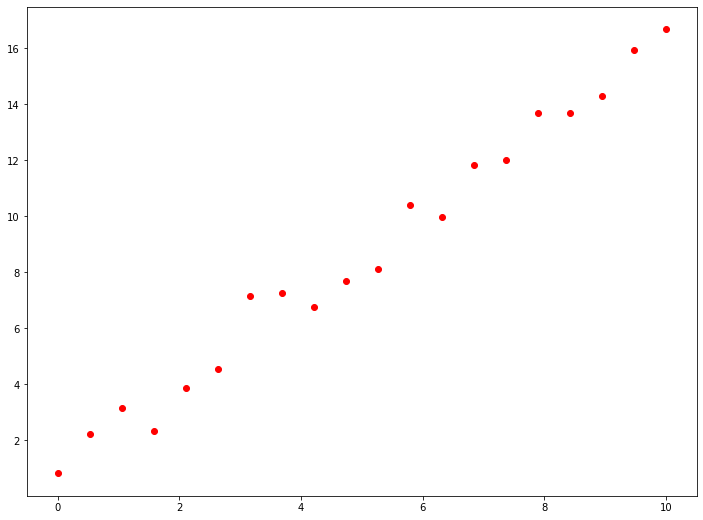

In [106]:
import numpy as np 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]

# Prints: [8.0, 6.0]
print("Current size:", fig_size)

# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

x = np.linspace(0,10, 20)



y = 1.5*x + 1
noise = np.random.normal(0,1,len(x))
ynoisy = y + noise
ynoisy = ynoisy.reshape(-1,1)

X = x.reshape(-1,1)
ones = np.ones([X.shape[0], 1])
X = np.concatenate((ones, X), axis = 1)


y = y.reshape(-1,1)


plt.scatter(x.reshape(-1,1), ynoisy.reshape(-1,1), facecolor='red')
plt.show()

#### Question I.1 (5pts)

Write a function 'linearRegression_Loss' that takes as input the matrix encoding the prototypes, i.e.

$$\mathbf{X} = \left[
  \begin{array}{ccc}
   - & (\mathbf{x}^{(1)})^{T} & - \\
    - & (\mathbf{x}^{(2)})^{T} & - \\
             & \vdots    &          \\
    - & (\mathbf{x}^{(n)})^{T} & -
  \end{array}
\right]$$

where the dataset is given by $\left\{\mathbf{x}^{(i)}, t_i\right\}$ and each $\mathbf{x}^{(i)}\in \mathbb{R}^D$ with 
$$\mathbf{x}^{(i)} = \left[\begin{array}{c}
x^{(i)}_1\\
\vdots \\
x^{(i)}_n\end{array}\right]$$

The function should implement gradient descent steps on the loss function

$$\ell(\boldsymbol{\beta}) = \frac{1}{2N}\sum_{i=1}^N \left(t^{(i)} - \left(\boldsymbol{\beta}^T\mathbf{x}^{(i)} +\beta_0\right)\right)^2$$

Here $\mathbf{\beta}$ encodes the weights $\beta_1, \beta_2, \ldots, \beta_D$ of the variables $x^{(i)}_1, \ldots, x^{(i)}_{D}$. 

In [107]:
def linearRegression_Loss_Linear(X, t):
    
    '''The function should take as input a matrix of sample points X 
    of size n by D (without the column of 1) as well as a vector of targets t 
    and return a vector of regression coefficients beta'''
    
    
    alpha = 0.0005
    iters = 1000
    theta = np.zeros([1,X.shape[1]])

    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - t), axis=0)
        cost[i] = np.sum(np.power(((X @ theta.T)-t),2))/(2 * len(X))

    return theta,cost,iters
    

    

#### Question I.2 (3pts)

Apply your function to the dataset show above and display the resulting line.

beta for non_redge: 
[[0.32278149 1.62882148]]


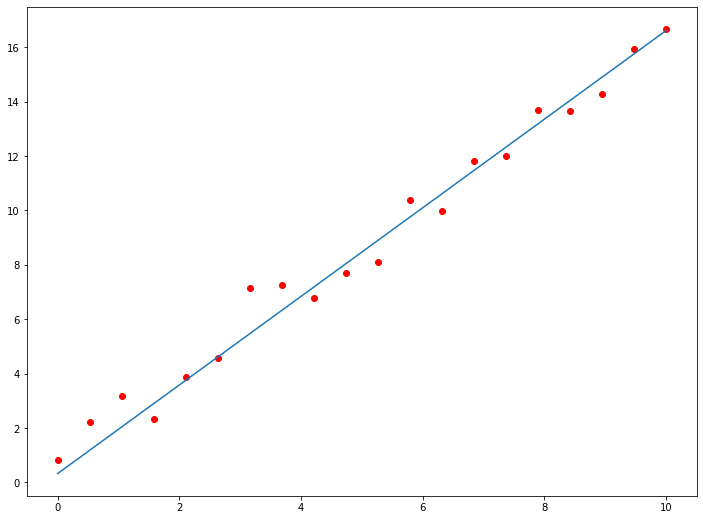

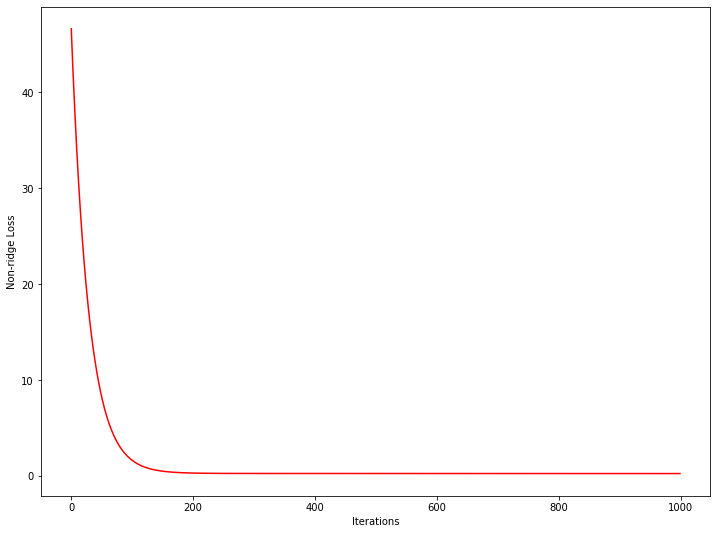

In [108]:
'''Displaying the linear regression model'''
non_ridge,cost,itersss = linearRegression_Loss_Linear(X,ynoisy)
# print("cost for non_redge: ")
# print(cost)
print("beta for non_redge: ")
print(non_ridge)

Y_pred2 = non_ridge[0][1]*x + non_ridge[0][0]
plt.scatter(x.reshape(-1,1), ynoisy.reshape(-1,1), facecolor='red')
plt.plot(x, Y_pred2)
plt.show()

fig, ax = plt.subplots()
ax.set_ylabel('Non-ridge Loss')
ax.set_xlabel('Iterations')
ax.plot(np.arange(1000), cost, 'r')

#### Question I.3 (5pts)

We now want to study how a more complex model would behave on our noisy dataset. In order to 
avoid bad surprises, we will start by augmenting your model with a regularization term.

Extend your function 'linearRegression_Loss' with an parameter 'reg' to which we can assign one of the following values 
- 'ridge'
- 'lasso'
- 'none'

Corresponding to the following models (the last choice encoding the OLS formulation given earlier)

$$\ell_{\text{Ridge}}(\mathbf{\beta})  = \frac{1}{2N}\sum_{i=1}^N \left(t^{(i)} - \left(\mathbf{\beta}^T\mathbf{x}^{(i)} + \beta_0\right)\right) + \lambda \sum_{i=1}^{D+1} |\beta_i|^2$$

$$\ell_{\text{LASSO}}(\mathbf{\beta})  = \frac{1}{2N}\sum_{i=1}^N \left(t^{(i)} - \left(\mathbf{\beta}^T\mathbf{x}^{(i)} + \beta_0\right)\right) + \lambda \sum_{i=1}^{D+1} |\beta_i|$$

Your new function should also take an additional argument encoding the weight of the regularization (we will call it lambdaR).

beta for ridge [0.31023167 1.60702386]


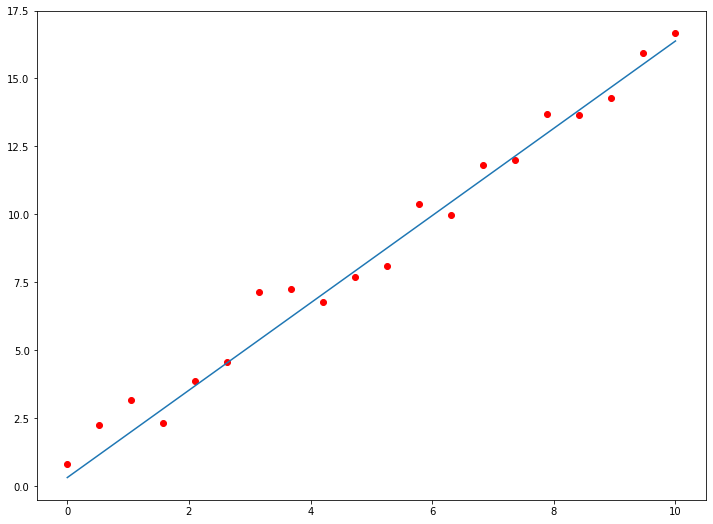

loss graph


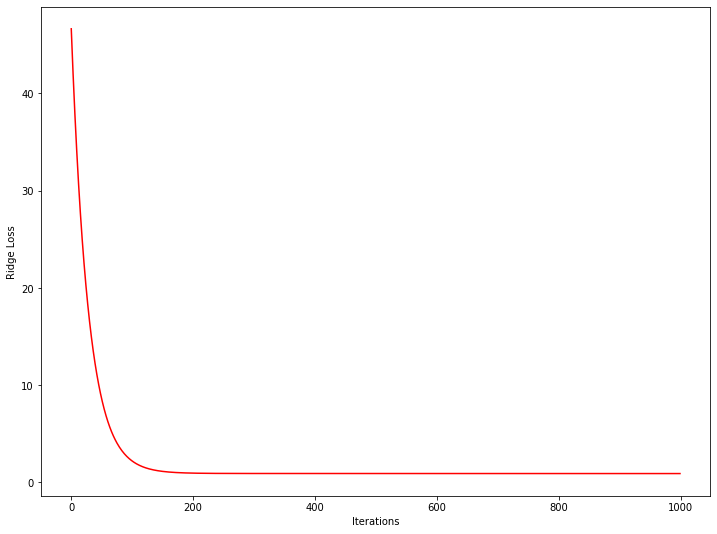

In [109]:

def costFunctionReg(X,y,theta,lamda = 10):
    #Initializations
    m = len(y)
    num = 0

    #Computations
    
    
    num = float((1./(2*m)) * (X @ theta - y).T @ (X @ theta - y)) + (lamda / (2*m)) * np.sum(np.square(theta));

    

    return(num)


def linearRegression_Loss(X,y,reg,lamda = 10):
    if(reg=="ridge"):
        
        iters=1000
        learning = 0.0005
        theta = np.zeros([1,X.shape[1]])
        theta = theta.T
        m = np.size(y)
        error = np.zeros(iters)


        for i in range(iters):
            #Hypothesis function
            h = np.dot(X,theta)

            #Calculating the grad function in vectorized form
            theta = theta - learning * (1/m)* ((X.T @ (h-y)) + lamda * theta)

            #Cost function in vectorized form
            error[i] = costFunctionReg(X,y,theta,lamda)

        return theta ,error
    else:
        return linearRegression_Loss(X, y)

    
theta, error = linearRegression_Loss(X,ynoisy,"ridge")
theta = theta.flatten()
print("beta for ridge",theta)

# print("error for ridge", error)

theta = theta.flatten()
plt.scatter(x.reshape(-1,1), ynoisy.reshape(-1,1), facecolor='red')
Y_pred = theta[1]*x + theta[0]
plt.plot(x, Y_pred)
plt.show()

print("loss graph")
fig, ax = plt.subplots()
ax.set_ylabel('Ridge Loss')
ax.set_xlabel('Iterations')
ax.plot(np.arange(1000), error, 'r')

#### Question I.4. (5pts) 

Apply your regularized regression implementation to the data above after generating additional features of the form 
$[x^2, x^3, \ldots, x^p]$ for $p = 10$. Note that this implies that your implementation should be able to handle multiple features. 
On that line you should make sure that your gradient algorithm computes a gradient that encodes all the partial derivatives 
$$\text{grad}_{\boldsymbol{\beta}}\ell(\boldsymbol{\beta}) = \left(\frac{\partial \ell(\boldsymbol{\beta})}{\partial \beta_1}, \ldots, \frac{\partial \ell(\boldsymbol{\beta})}{\partial \beta_{D+1}}\right)$$

plot the result without regularization and for the Ridge regression formulation for a few values of $\lambda$ (let's says $\lambda = 0.1, 1, 10$ and $100$)






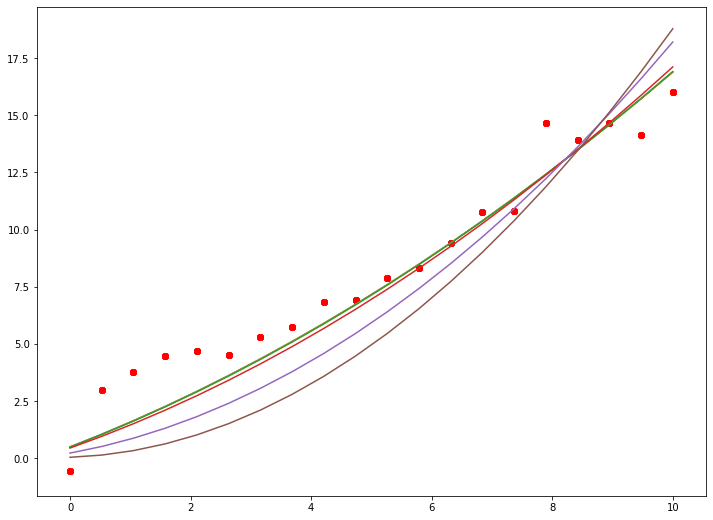

In [110]:
'''Use your implementation of linearRegression_Loss below'''

p =3
powers = np.arange(0,p) + 1

x = np.linspace(0,10, 20)
x2 = np.power(x, 2)
X = x.reshape(-1,1)
X2 = x2.reshape(-1,1)
X3 = np.concatenate((X, X2), axis = 1)
ones = np.ones([X.shape[0], 1])

X = np.concatenate((ones, X3), axis = 1)


y = 1.5*x + 1
noise = np.random.normal(0,1,len(x))
ynoisy = y + noise
y = y.reshape(-1,1)
ynoisy = ynoisy.reshape(-1,1)
X_ori = X


lambdaR = [0.1,1,10,100,1000]

non_ridge,cost,itersss = linearRegression_Loss_Linear(X,ynoisy)
non_ridge = non_ridge.flatten()
plt.plot(x,np.dot(X,non_ridge))
for i in lambdaR:
    
    theta0, error0 = linearRegression_Loss(X,ynoisy,"ridge",i)
    theta0 = theta0.flatten()
#     print(error0)
    plt.scatter(x.reshape(-1,1), ynoisy.reshape(-1,1), facecolor='red')
    plt.plot(x, np.dot(X,theta0))
        
        
        